In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2

In [6]:
cnn = tf.keras.models.load_model("new_model_1.h5")

In [7]:
test_set = tf.keras.utils.image_dataset_from_directory(
    './archive/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
[9.9974507e-01 4.9033941e-09 4.8091170e-11 6.7284432e-08 8.0315086e-12
 1.4972688e-05 4.0154468e-08 4.2288565e-11 2.3238900e-09 1.2898617e-10
 3.2268926e-10 5.6202106e-14 2.2412011e-14 5.2435486e-15 2.8646350e-12
 7.8415096e-12 1.6722443e-11 1.7695241e-10 6.2552252e-14 3.2324631e-05
 1.0877139e-06 5.1003649e-06 9.2383902e-07 3.3833496e-09 8.4346135e-15
 2.4931285e-12 1.5333289e-04 2.0386071e-09 3.3890348e-08 5.7651752e-15
 6.4335514e-16 1.3017442e-11 4.7951515e-10 4.7019912e-05 1.7726789e-14
 7.5589748e-09]
[0]


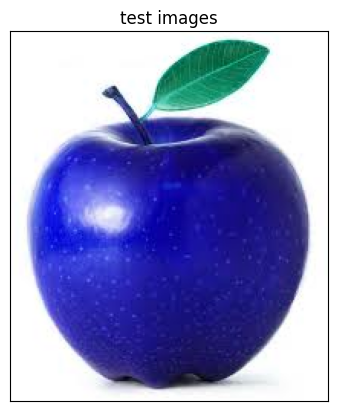

it's a apple


In [8]:
image_path = "./download.jpeg"
img = cv2.imread(image_path)

image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #coverting single image to batch
predictions = cnn.predict(input_arr)
print(predictions[0])
test_set.class_names
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0])
#display Image
plt.imshow(img)
plt.title('test images')
plt.xticks([])
plt.yticks([])
plt.show()
#single prediction
print("it's a {}".format(test_set.class_names[result_index[0][0]]))